In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
ds_data = pd.read_csv("./titanic.csv")
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
ds_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
cols_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = ds_data.drop(cols_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
le = LabelEncoder()

In [10]:
df["Sex"] = le.fit_transform(df["Sex"])
# male = 1, female = 0

In [12]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [14]:
data = df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [38]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
out_col = ['Survived']

X = data[input_cols]
y = data[out_col]

X.shape,y.shape

((714, 6), (714, 1))

In [19]:
#ata = data.reset_index(drop=True)
#data.head()

In [20]:
data.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [24]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
            
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_right,x_left

In [25]:
x_right,x_left = divide_data(data[:10],'Sex', 0.5)

In [27]:
x_right

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
5,0.0,1.0,1.0,54.0,0.0,0.0,51.8625
6,0.0,3.0,1.0,2.0,3.0,1.0,21.0750


In [28]:
x_left

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
7,1.0,3.0,0.0,27.0,0.0,2.0,11.1333
8,1.0,2.0,0.0,14.0,1.0,0.0,30.0708
9,1.0,3.0,0.0,4.0,1.0,1.0,16.7000


In [35]:
def entropy(col):
    
    counts = np.unique(col, return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1]:
        f = ix / N
        ent += (-1.0*f*np.log2(f))
    return ent

In [36]:
#counts = np.unique(data["Sex"], return_counts=True)
#counts[1]
#counts[1][0]

In [47]:
def information_gain(x_data, fkey, fval):
    right,left = divide_data(x_data, fkey, fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(x_data.Survived) - ( l*entropy(left.Survived) + r*entropy(right.Survived))

In [39]:
for fx in X.columns:
    print fx
    print information_gain(data, fx, data[fx].mean())

Pclass
0.0841581440715109
Sex
0.21601606075154256
Age
2.6666107433293007e-08
SibSp
0.006904127996153919
Parch
0.019278172321014586
Fare
0.05371958996365245


In [48]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
        
    def train(self, X_train):
        print self.depth, "#"*10
        
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        
        for ix in features:
            info_gains.append(information_gain(X_train, ix, X_train[ix].mean()))
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        
        data_right,data_left = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
                
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
            
        return
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [49]:
split = int(0.8*data.shape[0])
training_data = data[:split]
test_data = data[split:]

In [50]:
dt = DecisionTree()
dt.train(training_data)

0 ##########
1 ##########
2 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
2 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
1 ##########
2 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
2 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########
3 ##########
4 ##########
5 ##########
5 ##########
4 ##########
5 ##########
5 ##########


In [51]:
print dt.fkey,dt.fval
print dt.right.fkey,dt.right.fval
print dt.left.fkey,dt.left.fval

print dt.right.right.fkey,dt.right.right.fval
print dt.right.left.fkey,dt.right.left.fval

print dt.left.right.fkey,dt.left.right.fval
print dt.left.left.fkey,dt.left.left.fval

Sex 0.6322241681260946
Fare 28.257881994459833
Pclass 2.080952380952381
SibSp 1.0721649484536082
Fare 12.418069696969695
SibSp 0.9036144578313253
Age 30.830708661417322


In [52]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(X[:50],y[:50])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
dt.score(X,y)

0.711484593837535

In [69]:
import pydotplus

In [70]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [71]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

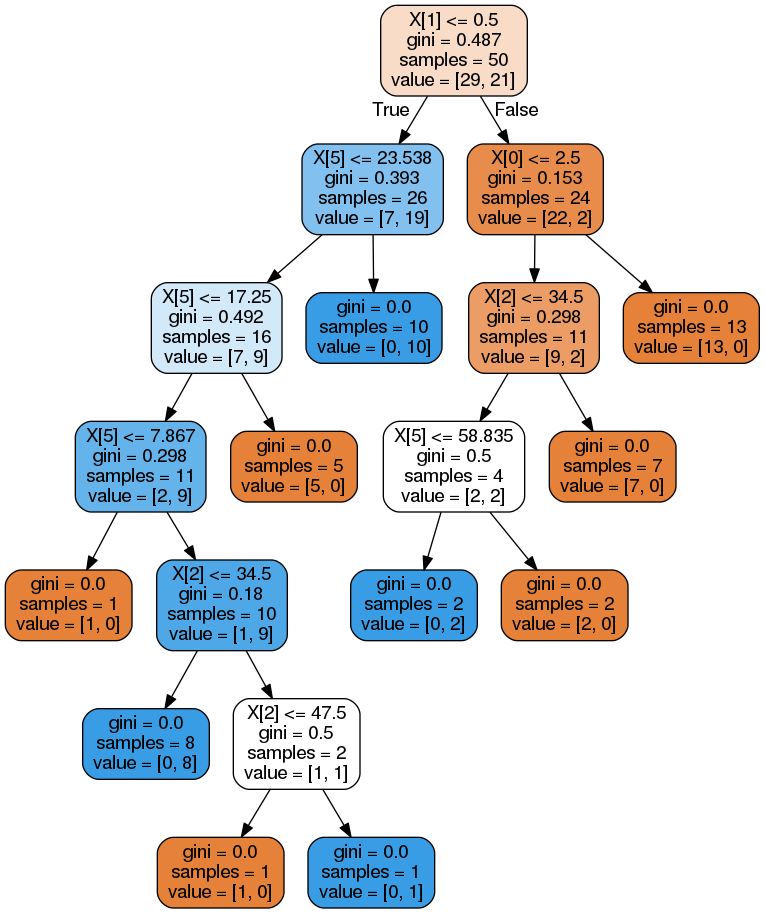

In [72]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())